# Import Data

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ALlow showing all columns
pd.set_option('display.max_columns', None)

In [2]:
# Import train.csv
df_train_dtypes = {"Store": int, 
                   "DayOfWeek": int,
                  "Date": "str",
                   "Sales": int,
                   "Customers": int,
                   "Open": int,
                   "Promo": int,
                   "StateHoliday": "str",
                   "SchoolHoliday": int}
df_train = pd.read_csv("../data/train.csv", dtype=df_train_dtypes, 
                       parse_dates=["Date"])
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [3]:
# Import store.csv
df_store_dtypes = {"Store": int, 
                   "StoreType": "str",
                  "Assortment": "str",
                    "PromoInterval": "str"}
df_store = pd.read_csv("../data/store.csv", dtype=df_store_dtypes)
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Make a copy of original data frames
df_train_original = df_train.copy()
df_store_original = df_store.copy()

# Data Cleaning and Feature Exploration

In [5]:
# Check unique values for StateHoliday and SchoolHoliday
print(df_train["StateHoliday"].unique())
print(df_train["SchoolHoliday"].unique())

['0' 'b' 'a' 'c']
[0 1]


In [6]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          914629 non-null  int32         
 1   DayOfWeek      914629 non-null  int32         
 2   Date           914629 non-null  datetime64[ns]
 3   Sales          914629 non-null  int32         
 4   Customers      914629 non-null  int32         
 5   Open           914629 non-null  int32         
 6   Promo          914629 non-null  int32         
 7   StateHoliday   914629 non-null  object        
 8   SchoolHoliday  914629 non-null  int32         
dtypes: datetime64[ns](1), int32(7), object(1)
memory usage: 38.4+ MB


In [8]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int32  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 82.9+ KB


### Sort data by date

In [10]:
# Sort data by date
df_train.sort_values(by=["Date"], inplace=True, ascending=True)
df_train.head()
# unnecessary as regression models were used in the end and not timeseries

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914628,1115,2,2013-01-01,0,0,0,0,a,1
913893,379,2,2013-01-01,0,0,0,0,a,1
913892,378,2,2013-01-01,0,0,0,0,a,1
913891,377,2,2013-01-01,0,0,0,0,a,1
913890,376,2,2013-01-01,0,0,0,0,a,1


### Add datetime parameters for `Date` column

In [11]:
df_train["saleYear"] = df_train.Date.dt.year
df_train["saleMonth"] = df_train.Date.dt.month
df_train["saleDayOfYear"] = df_train.Date.dt.dayofyear
df_train["saleWeekOfYear"] = df_train.Date.dt.weekofyear
df_train = df_train.rename(columns={"DayOfWeek": "saleDayOfWeek"})
df_train.head()

d:\miniconda3\envs\env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Store,saleDayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleWeekOfYear
914628,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
913893,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
913892,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
913891,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
913890,376,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1


In [12]:
# Rearrange columns
df_train = df_train[['Store', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'saleYear', 'saleMonth',
       'saleDayOfYear', 'saleDayOfWeek', 'saleWeekOfYear', 'Date']]
df_train.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date
914628,1115,0,0,0,0,a,1,2013,1,1,2,1,2013-01-01
913893,379,0,0,0,0,a,1,2013,1,1,2,1,2013-01-01
913892,378,0,0,0,0,a,1,2013,1,1,2,1,2013-01-01
913891,377,0,0,0,0,a,1,2013,1,1,2,1,2013-01-01
913890,376,0,0,0,0,a,1,2013,1,1,2,1,2013-01-01


## Check stores which are closed

In [13]:
df_train.groupby("Open")["Sales"].sum()

Open
0    0.000000e+00
1    5.264351e+09
Name: Sales, dtype: float64

It can be seen that stores where `Open = 0` have 0 sales. To prevent bias all stores with 0 sales will be removed from the dataset. It can be automatically assumed that all Closed stores will have 0 sales.

In [14]:
df_train = df_train[df_train.Open == 1]
df_train = df_train.drop("Open", axis=1)

### Join df_train and df_store, find a way to use df_store in dataset

In [15]:
df_merged = df_train.join(df_store.set_index('Store'), on='Store')

In [16]:
# Save original df
df_merged_original = df_merged
df_merged.head()

,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
913867,353,3139,820,0,a,1,2013,1,1,2,1,2013-01-01,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
913849,335,2401,482,0,a,1,2013,1,1,2,1,2013-01-01,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
914026,512,2646,625,0,a,1,2013,1,1,2,1,2013-01-01,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
914008,494,3113,527,0,a,1,2013,1,1,2,1,2013-01-01,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
914044,530,2907,532,0,a,1,2013,1,1,2,1,2013-01-01,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
df_merged = df_merged.reset_index()
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,913867,353,3139,820,0,a,1,2013,1,1,2,1,2013-01-01,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,913849,335,2401,482,0,a,1,2013,1,1,2,1,2013-01-01,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2,914026,512,2646,625,0,a,1,2013,1,1,2,1,2013-01-01,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
3,914008,494,3113,527,0,a,1,2013,1,1,2,1,2013-01-01,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
4,914044,530,2907,532,0,a,1,2013,1,1,2,1,2013-01-01,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
# Create function for "HasCompetition" column
def competition(c):
    compYear = int(c["CompetitionOpenSinceYear"]) if not pd.isna(c["CompetitionOpenSinceYear"]) else -1
    compMonth = int(c["CompetitionOpenSinceMonth"]) if not pd.isna(c["CompetitionOpenSinceMonth"]) else -1
    if c["saleYear"] == compYear:
        if c["saleMonth"] < compMonth:
            return 0
        else:
            return 1
    elif c["saleYear"] > compYear:
        return 1
    else:
        return 0

`HasCompetition` column will be based on "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" being compared with the sales date columns. 

Basically:

if the competition hasn't opened yet, `HasCompetition` = 0.

Otherwise `HasCompetition` = 1 

Additionally, if "CompetitionOpenSince...." columns are NaN, it will be assumed that the stores always had competition.

In [19]:
df_merged['HasCompetition'] = df_merged.apply(competition, axis=1)

In [20]:
# Drop old competition columns
df_merged = df_merged.drop(columns=["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"])
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HasCompetition
0,913867,353,3139,820,0,a,1,2013,1,1,2,1,2013-01-01,b,b,900.0,1,14.0,2013.0,"Feb,May,Aug,Nov",1
1,913849,335,2401,482,0,a,1,2013,1,1,2,1,2013-01-01,b,a,90.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1
2,914026,512,2646,625,0,a,1,2013,1,1,2,1,2013-01-01,b,b,590.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",1
3,914008,494,3113,527,0,a,1,2013,1,1,2,1,2013-01-01,b,a,1260.0,0,NaN,NaN,NaN,1
4,914044,530,2907,532,0,a,1,2013,1,1,2,1,2013-01-01,a,c,18160.0,0,NaN,NaN,NaN,1


In [21]:
# Create function for 'HasPromo2' column
def promo(row):
    promoYear = int(row["Promo2SinceYear"]) if not pd.isna(row["Promo2SinceYear"]) else -1
    promoWeek = int(row["Promo2SinceWeek"]) if not pd.isna(row["Promo2SinceWeek"]) else -1
    promoMonthList = row["PromoInterval"].split(",") if not pd.isna(row["PromoInterval"]) else []
    
#     Replace month strings with integer
    monthDict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sept": 9, "Oct": 10,
                "Nov": 11, "Dec": 12}
    for idx, month in enumerate(promoMonthList):
        for k in monthDict:
            if k in month:
                promoMonthList[idx] = month.replace(k, str(monthDict[k]))
    promoMonthList = list(map(int, promoMonthList)) 
        
    if row["saleYear"] > promoYear:
        if row["saleMonth"] in promoMonthList:
            return 1
    elif row["saleYear"] == promoYear:
        if row["saleWeekOfYear"] >= promoWeek:
            if row["saleMonth"] in promoMonthList:
                return 1
    return 0            

`HasPromo2` column will be used to determine whether or not the row at that point in time has an active Promo2. This will be determined by checking whether "Promo2SinceWeek" and "Promo2SinceYear" have started when compared with the sales date data. Afterwards the "PromoInterval" will be checked - whether or not the current month falls within the interval.

`HasPromo2` = 1 if above conditions are satisfied

Otherwise, `HasPromo2` = 0

In [22]:
df_merged["HasPromo2"] = df_merged.apply(promo, axis=1)
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HasCompetition,HasPromo2
0,913867,353,3139,820,0,a,1,2013,1,1,2,1,2013-01-01,b,b,900.0,1,14.0,2013.0,"Feb,May,Aug,Nov",1,0
1,913849,335,2401,482,0,a,1,2013,1,1,2,1,2013-01-01,b,a,90.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,0
2,914026,512,2646,625,0,a,1,2013,1,1,2,1,2013-01-01,b,b,590.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",1,0
3,914008,494,3113,527,0,a,1,2013,1,1,2,1,2013-01-01,b,a,1260.0,0,NaN,NaN,NaN,1,0
4,914044,530,2907,532,0,a,1,2013,1,1,2,1,2013-01-01,a,c,18160.0,0,NaN,NaN,NaN,1,0


In [23]:
# Drop irrelevant columns (Promo2 related, Date, Index)
df_merged = df_merged.drop(columns=["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval", "Date", "index"])
df_merged.head()

,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,StoreType,Assortment,CompetitionDistance,HasCompetition,HasPromo2
0,353,3139,820,0,a,1,2013,1,1,2,1,b,b,900.0,1,0
1,335,2401,482,0,a,1,2013,1,1,2,1,b,a,90.0,1,0
2,512,2646,625,0,a,1,2013,1,1,2,1,b,b,590.0,1,0
3,494,3113,527,0,a,1,2013,1,1,2,1,b,a,1260.0,1,0
4,530,2907,532,0,a,1,2013,1,1,2,1,a,c,18160.0,1,0


### Check for NaN columns

In [24]:
df_merged.isnull().any()

Store                  False
Sales                  False
Customers              False
Promo                  False
StateHoliday           False
SchoolHoliday          False
saleYear               False
saleMonth              False
saleDayOfYear          False
saleDayOfWeek          False
saleWeekOfYear         False
StoreType              False
Assortment             False
CompetitionDistance     True
HasCompetition         False
HasPromo2              False
dtype: bool

### Use median as imputation method for "ComputationDistance"

In [25]:
df_merged.fillna(df_merged.median(), inplace=True)
df_merged.isnull().any()

Store                  False
Sales                  False
Customers              False
Promo                  False
StateHoliday           False
SchoolHoliday          False
saleYear               False
saleMonth              False
saleDayOfYear          False
saleDayOfWeek          False
saleWeekOfYear         False
StoreType              False
Assortment             False
CompetitionDistance    False
HasCompetition         False
HasPromo2              False
dtype: bool

## Explore some more data

In [26]:
df_merged.groupby("Promo")["Sales"].mean()

Promo
0    5901.531344
1    8204.655851
Name: Sales, dtype: float64

In [27]:
df_merged.groupby("HasPromo2")["Sales"].mean()

HasPromo2
0    7011.287246
1    6441.638872
Name: Sales, dtype: float64

In [28]:
df_merged.groupby("StoreType")["Sales"].mean()

StoreType
a     6905.986379
b    10142.030002
c     6916.115287
d     6777.629781
Name: Sales, dtype: float64

In [29]:
df_merged.groupby("Assortment")["Sales"].mean()

Assortment
a    6606.820067
b    8495.498781
c    7259.191751
Name: Sales, dtype: float64

In [30]:
df_merged.groupby("saleYear")["Sales"].mean()

saleYear
2013    6814.392025
2014    7025.404201
2015    6998.948880
Name: Sales, dtype: float64

In [31]:
df_merged.groupby("StateHoliday")["Sales"].mean()

StateHoliday
0    6925.962123
a    8220.314176
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64

In [32]:
df_merged.groupby("saleDayOfWeek")["Sales"].mean()

saleDayOfWeek
1    8183.070805
2    7050.117394
3    6689.042329
4    6753.220681
5    7045.639970
6    5856.718290
7    8216.643037
Name: Sales, dtype: float64

In [33]:
df_merged.groupby("saleMonth")["Sales"].mean()

saleMonth
1     6563.690444
2     6589.165535
3     6976.412026
4     7046.228420
5     7010.020102
6     6846.331727
7     6908.727396
8     6648.984654
9     6546.343035
10    6602.843354
11    7188.554250
12    8608.956661
Name: Sales, dtype: float64

In [34]:
df_merged.groupby("HasCompetition")["Sales"].mean()

HasCompetition
0    7209.673114
1    6899.346909
Name: Sales, dtype: float64

In [35]:
df_merged.dtypes

Store                    int32
Sales                    int32
Customers                int32
Promo                    int32
StateHoliday            object
SchoolHoliday            int32
saleYear                 int64
saleMonth                int64
saleDayOfYear            int64
saleDayOfWeek            int32
saleWeekOfYear           int64
StoreType               object
Assortment              object
CompetitionDistance    float64
HasCompetition           int64
HasPromo2                int64
dtype: object

### Convert object columns to category data type
Namely StateHoliday, StoreType, and Assortment

In [36]:
df_merged["StateHoliday"] = df_merged["StateHoliday"].astype('category')
df_merged["StoreType"] = df_merged["StoreType"].astype('category')
df_merged["Assortment"] = df_merged["Assortment"].astype('category')
df_merged["SchoolHoliday"] = df_merged["SchoolHoliday"].astype('category')
df_merged["HasCompetition"] = df_merged["HasCompetition"].astype('category')
df_merged["HasPromo2"] = df_merged["HasPromo2"].astype('category')
df_merged["Store"] = df_merged["Store"].astype('category')

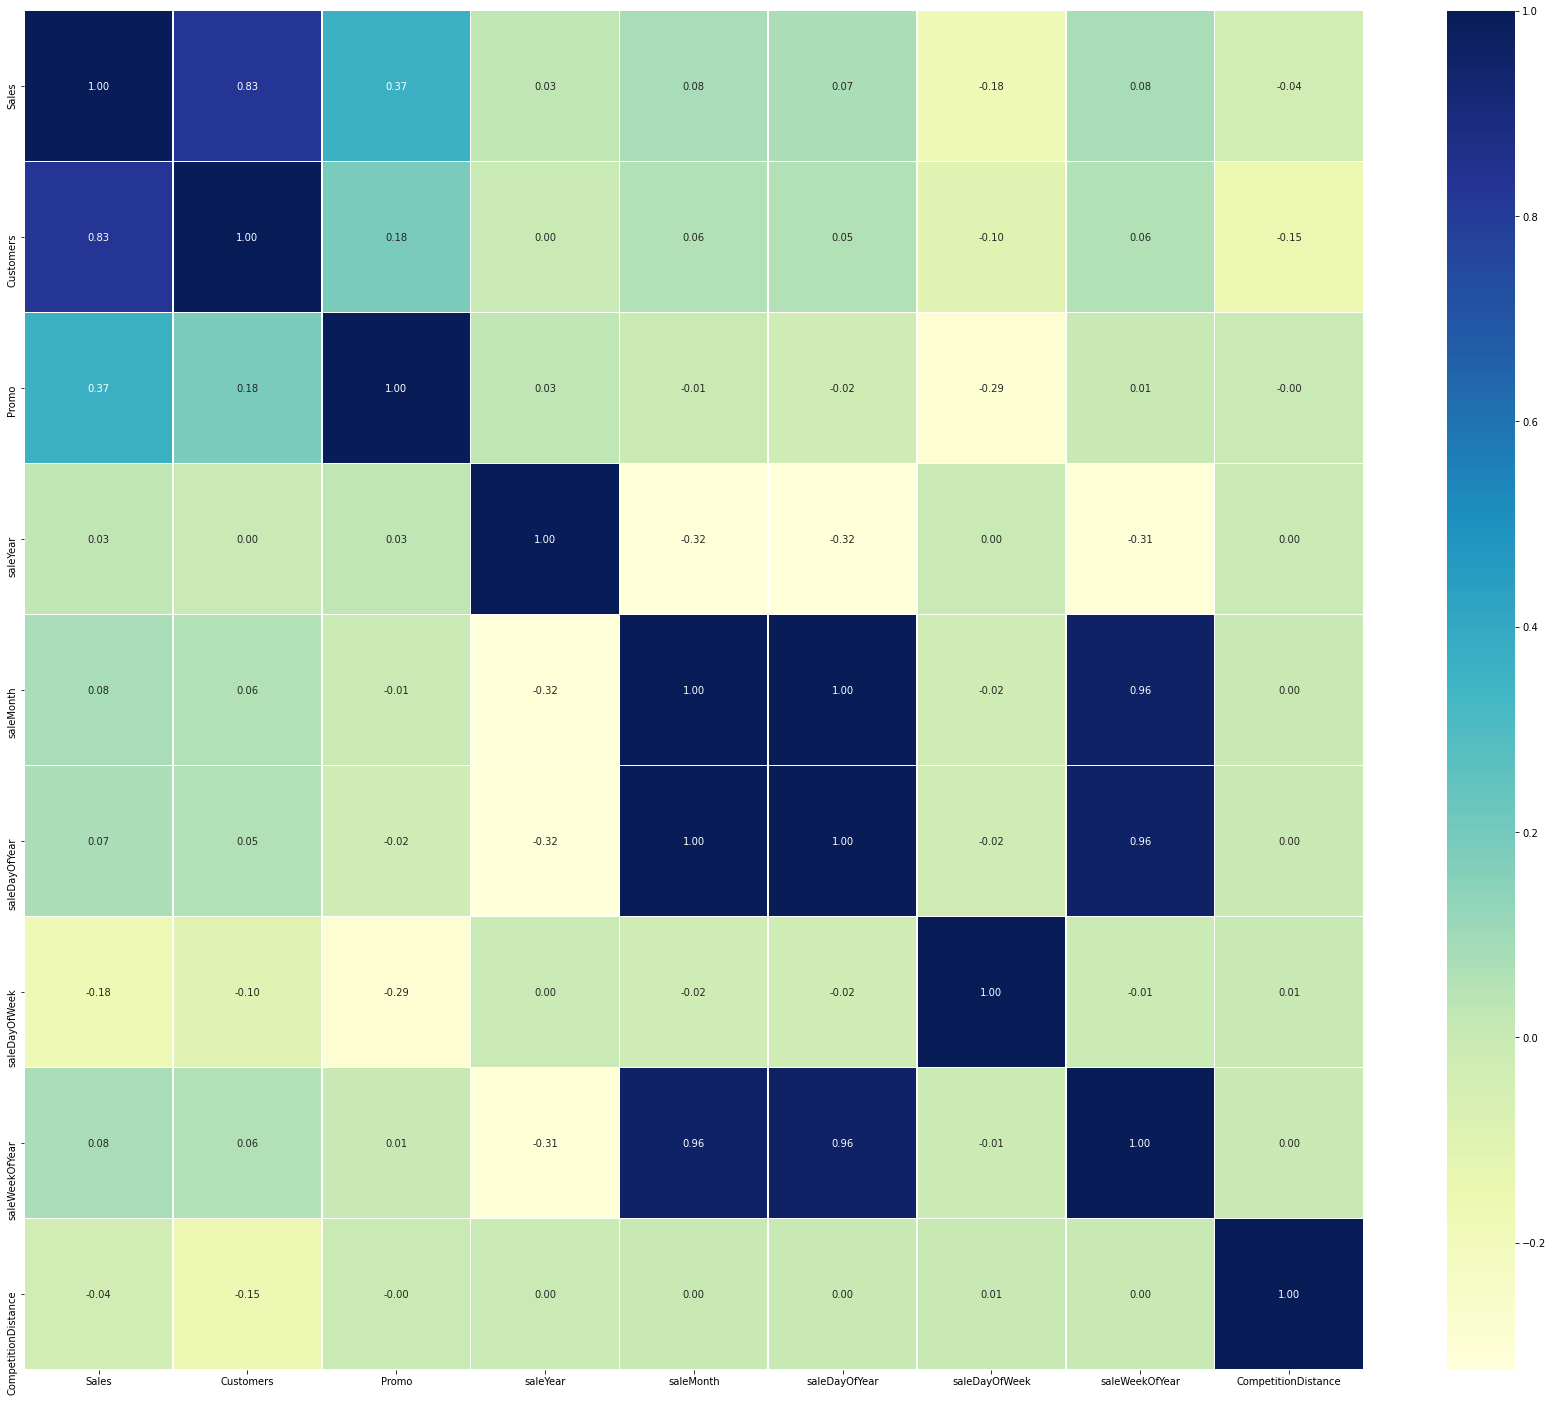

In [37]:
# Make a correlation matrix
corr_matrix = df_merged.corr(method="pearson")
fig, ax = plt.subplots(figsize=(30,25))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

It can be seen that <b>Customer</b>, <b>Promo</b>, and <b>saleDayOfWeek</b> have the highest impact on <b>Sales</b>

# Modeling

In [38]:
# Split data into X and y
X = df_merged.drop("Sales", axis = 1)
y = df_merged["Sales"]
X.shape, y.shape

((759901, 15), (759901,))

In [39]:
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(42)

# Divide data into training, test, and validation (70-15-15 split)
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train_pre, X_valid_pre, y_train, y_valid = train_test_split(X_train_pre, y_train, test_size=0.1765, random_state=1)
X_train_pre.shape, X_test_pre.shape, X_valid_pre.shape

((531911, 15), (113986, 15), (114004, 15))

In [40]:
# OneHotEncode categorical features, and scale other features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from joblib import dump, load

preprocessor = None

# Setup preprocessing functions
def preprocess_X(data):
    # Define which features should be encoded vs scaled vs not touched
    columns_to_encode = ["StateHoliday", "StoreType", "Assortment", "SchoolHoliday", "saleYear", "saleMonth", "saleDayOfWeek"]
    columns_to_scale  = ['Customers', 'CompetitionDistance']
    
    # encode cyclical data
    data = encode_cyclical(data, 'saleDayOfYear', 365)
    data = encode_cyclical(data, 'saleWeekOfYear', 52)
    
    global preprocessor
    if preprocessor is None:
        sscaler = StandardScaler()
        ohencoder = OneHotEncoder(handle_unknown='ignore')

        preprocessor = ColumnTransformer([
            ('scale', sscaler, columns_to_scale),
            ('encode', ohencoder, columns_to_encode)
        ], remainder='passthrough')
        
        preprocessor.fit(data)
        
        # Save preprocessor for API
        dump(preprocessor, 'preprocessor.joblib')
        
    processed_data = preprocessor.transform(data)
    

#     # Scale and Encode Separate Columns
#     scaled_columns = scaler.fit_transform(data[columns_to_scale]) 
#     encoded_columns = ohe.fit_transform(data[columns_to_encode])

#     # Concatenate (Column-Bind) Processed Columns Back Together
#     processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
#     processed_data = pd.DataFrame(processed_data)
    
    return processed_data

def encode_cyclical(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data.loc[:,(col)]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data.loc[:,(col)]/max_val)
    data.drop(col, axis=1)
    return data

In [41]:
# Preprocess all X data
X_train = preprocess_X(X_train_pre)
X_valid = preprocess_X(X_valid_pre)
X_test = preprocess_X(X_test_pre)
X_train.shape

d:\miniconda3\envs\env\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\miniconda3\envs\env\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(531911, 47)

In [42]:
# Create evaluation function (Root Mean Square Log Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmse(y_train, train_preds),
              "Valid RMSLE": rmse(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

## First, let's try RandomForestRegressor with hyperparameters tuned using RandomizedSearchCV

In [43]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set random seed
np.random.seed(42)

# max_samples using 10% of training data as this takes way too long
max_samples = round(X_train.shape[0]*0.1)
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [max_samples]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=3,
                              n_jobs=-1,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished


Wall time: 11min 38s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [53191],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [44]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 53191,
 'max_features': 'auto',
 'max_depth': None}

In [45]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 464.65757918147955,
 'Valid MAE': 514.4467137117995,
 'Training RMSLE': 673.2164079339633,
 'Valid RMSLE': 743.841113819785,
 'Training R^2': 0.9530187769416149,
 'Valid R^2': 0.9421607359886042}

In [46]:
# Find the best score
rs_model.best_score_

0.941864037384236

In [47]:
rs_model.score(X_test, y_test)

0.9432904785090552

## Next, let's try using Ridge Regression

In [48]:
%%time
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand

# Set random seed
np.random.seed(42)

ridge_grid = {'alpha': sp_rand()}

ridge_model = RandomizedSearchCV(Ridge(),
                              param_distributions=ridge_grid,
                              n_iter=100,
                              cv=3,
                            n_jobs=-1,
                              verbose=True)

ridge_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.3s finished


Wall time: 36.9 s


RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237C871ED88>},
                   verbose=True)

In [49]:
ridge_model.best_params_

{'alpha': 0.005522117123602399}

In [50]:
ridge_model.best_score_

0.8367664859466123

In [51]:
ridge_model.score(X_test, y_test)

0.8365197586951263

In [52]:
show_scores(ridge_model)

{'Training MAE': 922.5344998749769,
 'Valid MAE': 924.7215232714952,
 'Training RMSLE': 1254.6488212075335,
 'Valid RMSLE': 1259.0553290949226,
 'Training R^2': 0.8368228664442237,
 'Valid R^2': 0.8342887356650117}

## Finally, let's try using GradiantBoostingRegressor

In [53]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt   

# Set random seed
np.random.seed(42)

# gbr_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1]}
# gbr_model = RandomizedSearchCV(GradientBoostingRegressor(),
#                               param_distributions=gbr_grid,
#                               n_iter=100,
#                               cv=3,
#                             n_jobs=-1,
#                               verbose=True)

# Trying base model as RandomizedSearchCV was taking too long (~1 min per fit)
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

Wall time: 3min 14s


GradientBoostingRegressor()

In [54]:
gbr_model.score(X_test, y_test)

0.8830767491005962

In [55]:
show_scores(gbr_model)

{'Training MAE': 779.914655757923,
 'Valid MAE': 785.1116442550561,
 'Training RMSLE': 1059.6764269084947,
 'Valid RMSLE': 1068.1427548883034,
 'Training R^2': 0.8835977217030746,
 'Valid R^2': 0.8807328070604397}

## RandomForestRegressor scores best at ~93% on the test set
vs RidgeRegression at ~83% and GradientBoostingRegressor(without hyperparameter tuning) at ~88%

## Create new model using best parameters
but with max samples

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 53191,
 'max_features': 'auto',
 'max_depth': None}

In [56]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features="auto",
                                    n_jobs=-1,
                                    max_depth=None,
                                    max_samples=None,
                                   random_state=42)

ideal_model.fit(X_train, y_train)

Wall time: 57.8 s


RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42)

In [57]:
show_scores(ideal_model)

{'Training MAE': 133.90666732780488,
 'Valid MAE': 352.4702821830813,
 'Training RMSLE': 208.86305344212977,
 'Valid RMSLE': 538.9140613293065,
 'Training R^2': 0.9954779206403714,
 'Valid R^2': 0.9696400235437291}

In [58]:
ideal_model.score(X_test, y_test)

0.9697732352663796

# Save ideal model

In [59]:
from joblib import dump

dump(ideal_model, 'rfr.pkl', compress=5)

['rfr.pkl']